In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import timedelta
from netCDF4 import Dataset, date2num, num2date
import cftime
import glob
import os
import csv
%matplotlib inline
import datetime
import matplotlib.dates as mdates
import matplotlib.dates as md
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.gridspec as gridspec

In [25]:
ds = xr.open_dataset('3dpaws_nc/recordings_2025_07_06.nc')








time = ds['time']
ncf = '3dpaws_nc/recordings_2025_07_06.nc'
ncfile = Dataset(ncf,mode='r', format = 'NETCDF4')
numt = -1
time=ncfile.variables["time"][::5]
timestamp = cftime.num2pydate(time, ncfile.variables["time"].units)
timestring = timestamp[-1].strftime("%I:%M %p")
timestring2 = timestamp[0].strftime("%A %m/%d/%Y")

first = timestamp[0]
delta = timedelta(minutes = 60)
dates = list((first + delta * x for x in range(24)))
finalt=timestamp[0]+timedelta(minutes=1435)
temp = ds['mcp9808']*units.degC
#humidity = ds['relative_humidity']*units.percent

#dewpoint = mpcalc.dewpoint_from_relative_humidity(temp, humidity)
#ds['dewpoint'] = dewpoint.metpy.dequantify()

TIP_MM = 0.2
interval_hr = 1 / 60  # 1 minute in hours
ds['precip_rate'] = (ds['tipping'] * TIP_MM) / interval_hr  # mm/hr


In [27]:
ds.head()

<xarray.Dataset> Size: 640B
Dimensions:      (time: 5)
Coordinates:
  * time         (time) datetime64[ns] 40B 2025-07-06 ... 2025-07-06T00:04:00
Data variables: (12/15)
    year         (time) int64 40B ...
    month        (time) int64 40B ...
    day          (time) int64 40B ...
    hour         (time) int64 40B ...
    minute       (time) int64 40B ...
    int          (time) int64 40B ...
    ...           ...
    sht_hum      (time) float64 40B ...
    mcp9808      (time) float64 40B 31.75 31.75 31.69 31.75 31.69
    tipping      (time) float64 40B 0.0 0.0 0.0 0.2 0.0
    wind_dir     (time) float64 40B ...
    wind_speed   (time) float64 40B 3.45 4.36 2.25 2.39 3.06
    precip_rate  (time) float64 40B 0.0 0.0 0.0 2.4 0.0

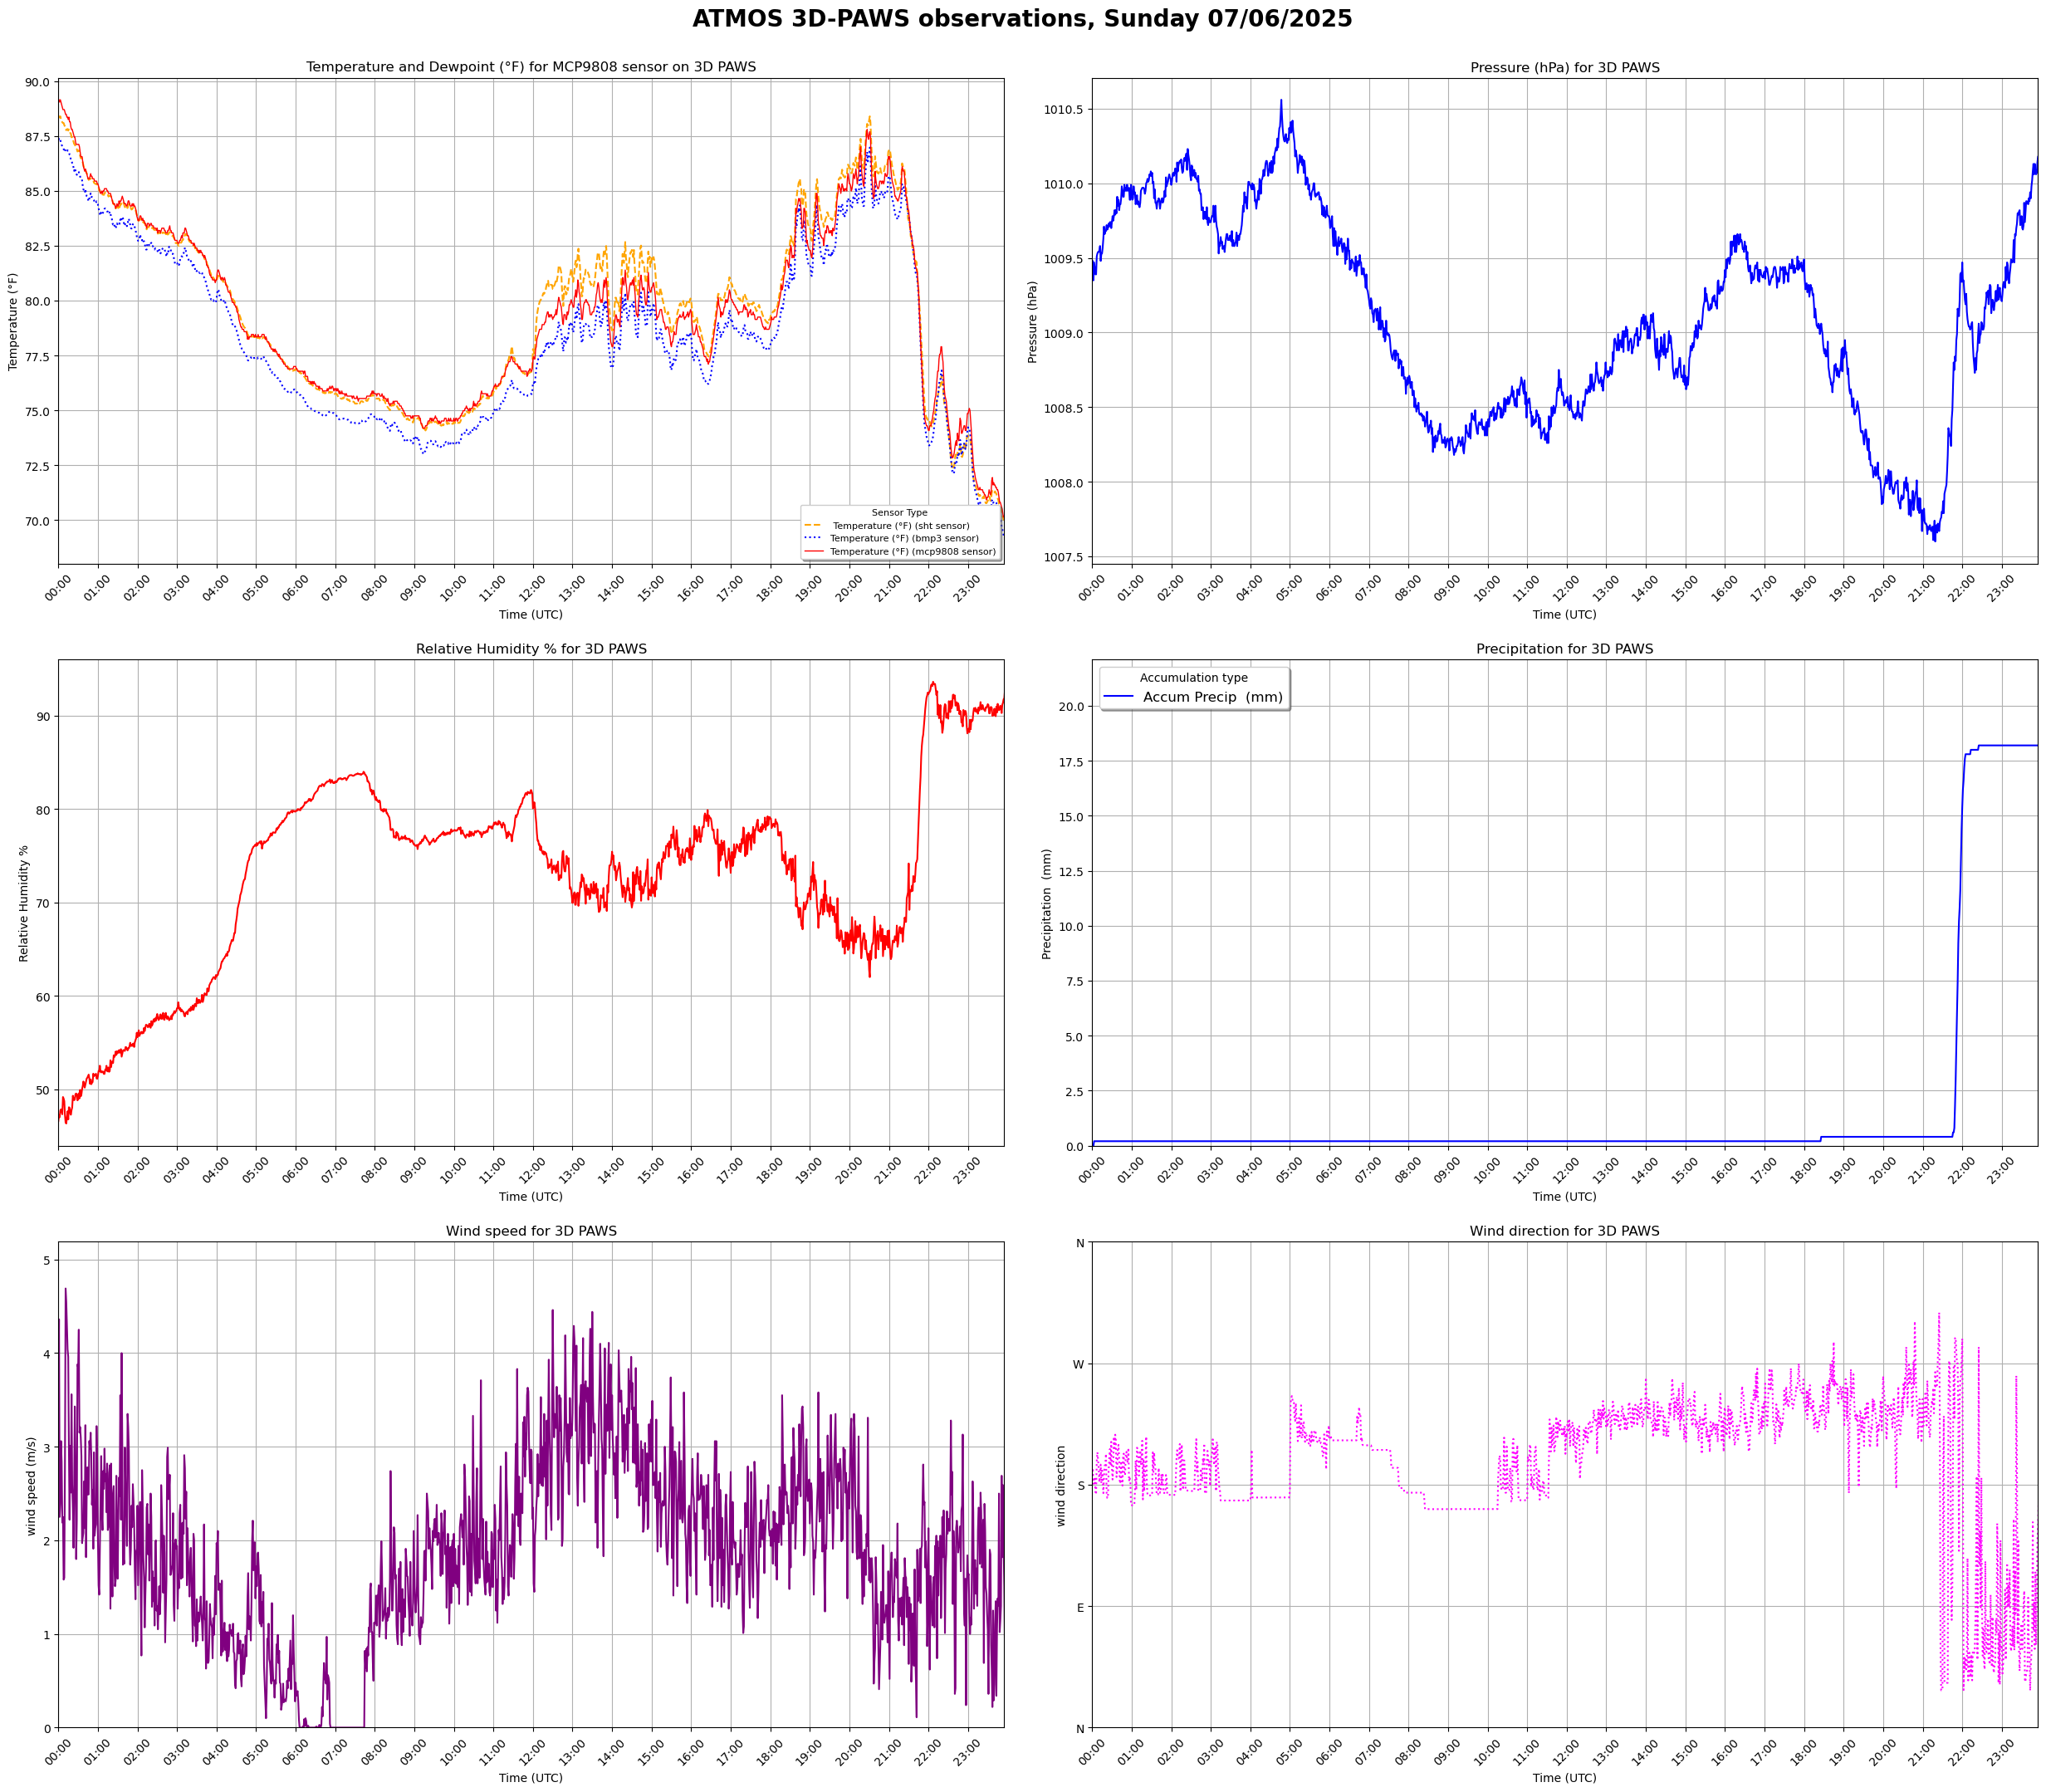

In [39]:
ds['cum'] = ds['tipping'].cumsum()


windspd_max = ds['wind_speed'].max()
precip_max = ds['precip_rate'].max()
cum_max = ds['cum'].max()



fig = plt.figure(figsize=(25, 35))


spec2 = gridspec.GridSpec(ncols=2, nrows=5, figure=fig)


ax1 = fig.add_subplot(spec2[1, 0])
ax2 = fig.add_subplot(spec2[1, 1])
ax3 = fig.add_subplot(spec2[2, 0])
ax4 = fig.add_subplot(spec2[2, 1])
ax5 = fig.add_subplot(spec2[3, 0])
ax6 = fig.add_subplot(spec2[3, 1])




# Plot temperature
tempF_sht = (ds['sht_temp']*(9/5))+32
tempF_mcp = (ds['mcp9808']*(9/5))+32
tempF_bmp3 = (ds['bmp3_temp']*(9/5))+32
#tempF_dew = (ds['dewpoint']*(9/5))+32

#ax1.plot(ds['time'], tempF_dew, '-', color = 'green' , linewidth = 1, label = 'Dew point with mcp9808 (°F)')
ax1.plot(ds['time'], tempF_sht, '--', color = 'orange', label = ' Temperature (°F) (sht sensor)' )
ax1.plot(ds['time'], tempF_bmp3, ':', color = 'blue', label = 'Temperature (°F) (bmp3 sensor)' )
ax1.plot(ds['time'], tempF_mcp, '-', color = 'red', linewidth = 1, label = 'Temperature (°F) (mcp9808 sensor)')
ax1.set_ylabel("Temperature (°F)")
ax1.set_xlabel("Time (UTC)")
ax1.set_title("Temperature and Dewpoint (°F) for MCP9808 sensor on 3D PAWS")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)
ax1.tick_params(axis = 'x', which = 'major', labelsize = 10)
ax1.legend(loc='lower right', framealpha=1, shadow=True, fontsize=8, title='Sensor Type', title_fontsize=8)





# Plot sea level pressure
ax2.plot(ds['time'], ds['bmp3_slp'], color='blue')
ax2.set_ylabel("Pressure (hPa)")
ax2.set_xlabel("Time (UTC)")
ax2.set_title("Pressure (hPa) for 3D PAWS")
ax2.ticklabel_format(axis='y', useOffset=False, style='plain')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)
ax2.tick_params(axis = 'x', which = 'major', labelsize = 10)


#plot humidity
ax3.plot(ds['time'], ds['sht_hum'], color='red')
ax3.set_ylabel("Relative Humidity %")
ax3.set_xlabel("Time (UTC)")
ax3.set_title("Relative Humidity % for 3D PAWS")
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax3.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True)
ax3.tick_params(axis = 'x', which = 'major', labelsize = 10)


#precip plot
#ax4.plot(ds['time'], ds['tipping'], color='blue', label = 'rate (mm/hr)')
line2, = ax4.plot(ds['time'], ds['cum'], color='blue', label='Accum Precip  (mm)')
#ax4a = ax4.twinx()
#ax4a.plot(ds['time'], ds['cum'], color = 'red', label = 'accum precip (mm)')
#line2, = ax4a.plot(ds['time'], ds['cum'], color='red', label='Accum precip (mm)')
ax4.set_ylabel("Precipitation  (mm)")
ax4.set_xlabel("Time (UTC)")
ax4.set_title("Precipitation for 3D PAWS")
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax4.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True)
ax4.set_ylim(bottom = 0)
ax4.set_ylim(top = precip_max + 0.5)
#ax4a.set_ylim(bottom = 0)
#ax4a.set_ylim(top = cum_max + 5)
#ax4a.set_ylabel('cumulative precip (mm)')
ax4.tick_params(axis = 'x', which = 'major', labelsize = 10)
ax4.legend(loc='upper left', framealpha=1, shadow=True, fontsize=12, title='Accumulation type', title_fontsize=10)

lines = [ line2]
labels = [line.get_label() for line in lines]
#ax4.legend(lines, labels, loc='upper left', framealpha=1, shadow=True,
           #fontsize=12, title='Accumulation type', title_fontsize=10)



#wind speed plot
ax5.plot(ds['time'], ds['wind_speed'], color='purple')
ax5.set_ylabel("wind speed (m/s)")
ax5.set_xlabel("Time (UTC)")
ax5.set_title("Wind speed for 3D PAWS")
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax5.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax5.set_ylim(ymin = 0)
ax5.set_ylim(top = windspd_max + 0.5)
ax5.tick_params(axis='x', rotation=45)
ax5.grid(True)
ax5.tick_params(axis = 'x', which = 'major', labelsize = 10)




#wind direction plot
ax6.plot(ds['time'], ds['wind_dir'], ':', color='magenta', )
ax6.set_ylabel("wind direction")
ax6.set_xlabel("Time (UTC)")
ax6.set_title("Wind direction for 3D PAWS")
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax6.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax6.set_ylim(ymin=0,ymax=360)
ax6.set_yticks([0,90,180,270,360])
ax6.set_yticklabels(['N','E','S','W','N'])
ax6.set_ylim(bottom = 0)
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True)






ax1.set_xlim(xmin=timestamp[0])
ax2.set_xlim(xmin=timestamp[0])
ax3.set_xlim(xmin=timestamp[0])
ax4.set_xlim(xmin=timestamp[0])
ax5.set_xlim(xmin=timestamp[0])
ax6.set_xlim(xmin=timestamp[0])

ax1.set_xlim(xmax=finalt)
ax2.set_xlim(xmax=timestamp[-1])
ax3.set_xlim(xmax=timestamp[-1])
ax4.set_xlim(xmax=timestamp[-1])
ax5.set_xlim(xmax=timestamp[-1])
ax6.set_xlim(xmax=timestamp[-1])

plt.setp(ax1.get_xticklabels(), fontsize=10)
plt.setp(ax2.get_xticklabels(), fontsize=10)
plt.setp(ax1.get_yticklabels(), fontsize=10)
plt.setp(ax2.get_yticklabels(), fontsize=10)

plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax4.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), fontsize=10)
plt.setp(ax4.get_yticklabels(), fontsize=10)

plt.setp(ax5.get_xticklabels(), fontsize=10)
plt.setp(ax6.get_xticklabels(), fontsize=10)
plt.setp(ax5.get_yticklabels(), fontsize=10)
plt.setp(ax6.get_yticklabels(), fontsize=10)



fig.suptitle('ATMOS 3D-PAWS observations, '+timestring2, fontsize = 20, y=.8, fontweight='bold')





plt.tight_layout(pad = 2.0)
plt.show()

ds.close()

